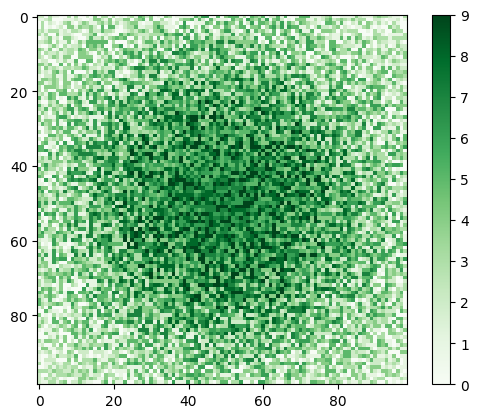

In [273]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open("input8") as f:
    trees = np.array([list(map(int, list(x))) for x in f.read().splitlines()])

N = trees.shape[0]

def plot(trees):
    plt.imshow(trees, cmap='Greens')
    plt.colorbar()
    plt.show()
    
plot(trees)

21


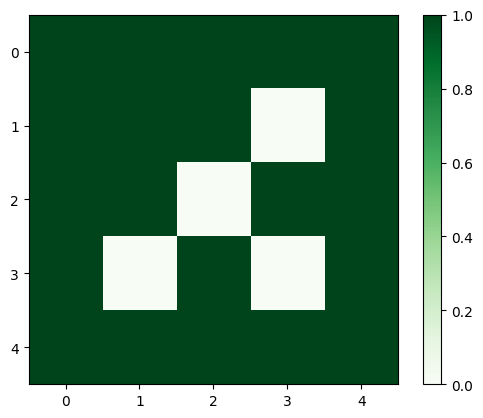

In [221]:
visible = np.zeros(trees.shape)

for i in range(N):
    for j in range(N):
        tree = trees[i, j]
        if np.all(trees[:i, j] < tree) or \
        np.all(trees[i+1:, j] < tree) or \
        np.all(trees[i, j+1:] < tree) or \
        np.all(trees[i, :j] < tree):
            visible[i, j] = 1
            
# edges are visible by definition
visible[0, :] = 1
visible[:, 0] = 1
visible[N-1, :] = 1
visible[:, N-1] = 1
print(int(visible.sum()))
plot(visible)

In [274]:
# part 2
# set corners to 9 since they are always counted 'visible'
trees[0, :] = 9
trees[:, 0] = 9
trees[N-1, :] = 9
trees[:, N-1] = 9

sscores = np.zeros(trees.shape)
for i in range(1,N-1):
    for j in range(1,N-1):
        tree = trees[i,j]
        
        # left
        left_visible = trees[i, :j] >= tree
        left = j - np.where(left_visible)[0].max()
        
        # right
        right_visible = trees[i, j+1:] >= tree
        right = np.where(right_visible)[0].min() + 1
        
        # up
        up_visible = trees[:i, j] >= tree
        up = i - np.where(up_visible)[0].max()
        
        # down
        down_visible = trees[i+1:, j] >= tree
        down = np.where(down_visible)[0].min() + 1
        
        sscores[i,j] = left * right * up * down
        
int(sscores.max())

268800

1